# Pandas Hands on

Inspired by [talumbau/strata_data](https://github.com/talumbau/strata_data) 
In this notebook we are going to learn the following:
- Pandas Data Structures: How We Work With Data
- Pandas I/O: How We Get Our Data into Pandas
- Slicing/Dicing/Mixing/Matching

Basically, this notebook is for practicing Pandas, the universal practical data analysis. It is called
**swiss knife** tool of data analysis.


### Why is Pandas fast?
- If you are familiar with *Numpy*, `Series` and `DataFrames` are built upon `numpy.ndarray`.
- pandas supports the same `ufunc` operations as in *Numpy*, and the same fast vectorized computations.


### Pandas Data Structures

#### Series

- One dimensional serial data
- It is basically a one dimensional array of **homogeneous** data.
- Series objects also include a second array called **Index**. It can contain homogeneous values of any type like integers, strings or datetime objects.


#### DataFrame

- Two dimensional collection of tabular data
- It is basically a two-dimensional table of **heterogeneous** data, composed of multiple **Series**.
- Like Series, DataFrame objects include a column index. The index objects permits for very sophisticated selection operations using square brackets ([]) along with some specialized selection functions.

We will explore series and dataframes in more details in next section.

Lets get our hands dirty

In [3]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

0.24.2
1.15.4


In [4]:
# to embed plots in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Set Jupyter notebook display options
pd.options.display.max_rows = 8
pd.options.display.max_columns = 8

Sidenote: Explore more `pd.options` for more pandas configuration options

### Creating a Series

Let's explore some ways to create pandas series from various python data structures. Later we will see how we can read data from various sources.

#### Creating a series from python list.

In [6]:
lst = [1, 3, 5, 7]
lst_series = pd.Series(lst)
print(lst_series)
print(type(lst_series))

0    1
1    3
2    5
3    7
dtype: int64
<class 'pandas.core.series.Series'>


#### Creating a series from a python dict

In [7]:
dictionary = {'Orange' : 'Fruit', 'Apple' : 'Phone'}
dict_series = pd.Series(dictionary)
print(dict_series)
print(type(dict_series))

Orange    Fruit
Apple     Phone
dtype: object
<class 'pandas.core.series.Series'>


#### Creating a series from a ordered dict

In [8]:

from collections import OrderedDict
od = OrderedDict([('c', 300), ('a', 100 ), ('d', 400), ('b', 200)])
ordered_dict_series = pd.Series(od)
print(ordered_dict_series)
print(type(ordered_dict_series))

c    300
a    100
d    400
b    200
dtype: int64
<class 'pandas.core.series.Series'>


#### Creating a series from a NumPy array

In [9]:
num_arr = np.arange(1, 6) * 10.0
num_arr_series = pd.Series(num_arr)
print(num_arr, type(num_arr))
print(num_arr_series, type(num_arr_series))

[10. 20. 30. 40. 50.] <class 'numpy.ndarray'>
0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64 <class 'pandas.core.series.Series'>


#### Series's index
pandas series object always has an index. The default index is just a sequence of integers

In [10]:
num_arr_series.index

RangeIndex(start=0, stop=5, step=1)

It is used for 0 based indexing

In [11]:
num_arr_series.iloc[0]

10.0

The index can be set to a sequence of labels.


In [12]:
index = ['a', 'b', 'c', 'd', 'a']
num_arr_series2 = pd.Series(np.arange(1, 6) * 10.0, index=index)
num_arr_series2.index

Index(['a', 'b', 'c', 'd', 'a'], dtype='object')

In [13]:
num_arr_series2.loc['b']

20.0

In [14]:
num_arr_series2.loc['a']

a    10.0
a    50.0
dtype: float64

#### Iterate over a panda series

In [15]:
for key, value in num_arr_series.iteritems():
    print(key, value)

0 10.0
1 20.0
2 30.0
3 40.0
4 50.0


In [16]:
for key, value in num_arr_series2.iteritems():
    print(key, value)

a 10.0
b 20.0
c 30.0
d 40.0
a 50.0


#### Pandas slicing
`series_object.iloc[start_index : end_index]` Start index is inclusive, end index is exclusive.

In [17]:
num_arr_series.iloc[1:4]

1    20.0
2    30.0
3    40.0
dtype: float64

However, when it comes to slicing with labels, end index is also inclusive.

In [18]:
num_arr_series2.loc['b' : 'c']

b    20.0
c    30.0
dtype: float64

Slicing from the end

In [19]:
num_arr_series.iloc[-1:]

4    50.0
dtype: float64

Slicing from the beginning

In [20]:
num_arr_series.iloc[:-3]

0    10.0
1    20.0
dtype: float64

Slice with labels with integer step size

In [21]:
num_arr_series2.loc['d' : 'b' : -2]

d    40.0
b    20.0
dtype: float64

#### Series Arithmetic
Arithmetic with series is as with numpy arrays.

In [22]:
print("Current series:\n", num_arr_series)
print("Multiplying series by 2:\n", num_arr_series * 2)
print("Adding 2 to series:\n", num_arr_series + 2)

Current series:
 0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
Multiplying series by 2:
 0     20.0
1     40.0
2     60.0
3     80.0
4    100.0
dtype: float64
Adding 2 to series:
 0    12.0
1    22.0
2    32.0
3    42.0
4    52.0
dtype: float64


#### Some more interaction with numpy
##### Applying numpy ufuncs
Numpy ufuncs can be applied elementwise to Series. for example numpy's [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
which returns evenly spaced number within an interval can be applied to series in following way. In this we are creating a pandas series which starts from -pi to +pi and divides this range in 100 intervals.

In [23]:
series_2pi = pd.Series(np.linspace(-1 * np.pi, +1 * np.pi, 100))
series_2pi

0    -3.141593
1    -3.078126
2    -3.014660
3    -2.951193
        ...   
96    2.951193
97    3.014660
98    3.078126
99    3.141593
Length: 100, dtype: float64

Even though pandas was built on numpy, numpy methods applied on pandas's series still return a series.

In [24]:
series_cos = np.cos(series_2pi)
series_cos

0    -1.000000
1    -0.997987
2    -0.991955
3    -0.981929
        ...   
96   -0.981929
97   -0.991955
98   -0.997987
99   -1.000000
Length: 100, dtype: float64

#### Plotting the series with Matplotlib

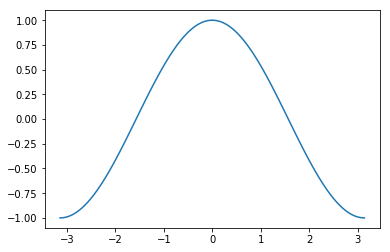

In [25]:
plt.plot(series_2pi, series_cos)

#### Some more series operations.
##### Adding two series

In [26]:
series1 = pd.Series([2, 4, 6, 8, 10])
print(series1)
series2 = pd.Series([1, 3, 5, 7, 9])
print(series2)
series1 + series2

0     2
1     4
2     6
3     8
4    10
dtype: int64
0    1
1    3
2    5
3    7
4    9
dtype: int64


0     3
1     7
2    11
3    15
4    19
dtype: int64

More fun with labels

In [27]:
series1 = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
series2 = pd.Series([10, 20, 30,40, 50], index=['c', 'd', 'e', 'f', 'g'])

#Notice what happens when we add ('c' -> 'c')
print(series1 + series2)

a     NaN
b     NaN
c    13.0
d    24.0
e    35.0
f     NaN
g     NaN
dtype: float64


In [28]:
(series1 + series2).mean()
# (13 + 24 + 35)/3

24.0

**Notice**: There is a difference between pandas and numpy when it comes to *NaN*.

In [29]:
print("Pandas mean: ", pd.Series([10.0, 20.0, np.nan]).mean())
print("Numpy mean: ", np.array([10.0, 20.0, np.nan]).mean())

Pandas mean:  15.0
Numpy mean:  nan


### Creating a Pandas DataFrame

As discussed above, pandas DataFrame are
- Two dimensional collection of tabular data
- It is basically a two-dimensional table of **heterogeneous** data, composed of multiple **Series**.
- Like Series, DataFrame objects include a column index. The index objects permits for very sophisticated selection operations using square brackets ([]) along with some specialized selection functions.


#### Creating a pandas DataFrame from various python datastructures
Like series, pandas DataFrames can be created from various python/numpy datastructures:
- python dict of 1D sequences (e.g. ndarrays, lists, dicts, or Series)
- 2-D numpy.ndarray
- pandas series
- another DataFrame

Please refer to series section above, it is basically similar.

Pandas DataFrames objects have column names. They can be accessed in following ways through column names:
- Dict style : df['name']
- Attribute style: df.name

DataFrame binary operations (+ - / *) defaults to outer join, on both columns as well as the index
NaN can be handled after join. Let us explore some pandas DataFrame functionality

##### DataFrame from a python dict

In [30]:
# Magic of pandas
dictionary = {
    'col1' : [1, 2, 3, 4, 5],
    'col2' : 0.0,               ## This will be extended to all columns
    'col3' : np.linspace(-1*np.pi, 1*np.pi, 5),
    'col4' : ["a", "random", "set", "of", "strings"]
}

df_dict = pd.DataFrame(dictionary)
df_dict

,col1,col2,col3,col4
0,1,0.0,-3.141593,a
1,2,0.0,-1.570796,random
2,3,0.0,0.000000,set
3,4,0.0,1.570796,of
4,5,0.0,3.141593,strings


###### Inspect columns and index of  DataFrame

In [31]:
df_dict.columns

Index(['col1', 'col2', 'col3', 'col4'], dtype='object')

In [32]:
df_dict.index

RangeIndex(start=0, stop=5, step=1)

`.info` gives a tonne of information about DataFrame. For example:
- The name of each column
- The `numpy.dtype` of each column
- How many actual values are present i.e. how many are missing.
- Amount of memory used


In [33]:
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
col1    5 non-null int64
col2    5 non-null float64
col3    5 non-null float64
col4    5 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 240.0+ bytes


#### Creating a DataFrame from a file

In [34]:
file = 'data/exoplanets.csv'
df_exoplanets = pd.read_csv(file)
type(df_exoplanets)

pandas.core.frame.DataFrame

In [35]:
df_exoplanets.head()

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
3,PSR B1257+12 A,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
4,beta Gem b,Hatzes 1993,http://adsabs.harvard.edu/abs/1993ApJ...413..339H,1993,...,+07:45:19.36,+28:01:34.72,2.080000,8.156090


#### DataFrame Indexing
- Pandas DataFrames have a special Index, goes beyond integer indexing.
- Pandas DataFrames are indexed by column label, then (row) Index:

In [36]:
df_another_dict = pd.DataFrame({
    'col1' : [1, 2, 3, 4, 5],
    'col2' : np.random.random(5),
    'col3' : [10, 20, 30, 40, 50]},
index = ['jan', 'feb', 'mar', 'apr', 'may'])
df_another_dict

,col1,col2,col3
jan,1,0.799808,10
feb,2,0.669896,20
mar,3,0.925342,30
apr,4,0.124514,40
may,5,0.080030,50


##### Indexing a DataFrame by column name, returns a series

In [37]:
who_am_i = df_another_dict['col2']
print(who_am_i)
type(who_am_i)

jan    0.799808
feb    0.669896
mar    0.925342
apr    0.124514
may    0.080030
Name: col2, dtype: float64


pandas.core.series.Series

##### Positional indexing

In [38]:
df_another_dict['col2'].iloc[2]

0.9253420166267652

##### Indexing the column name, gives a Series, then 'label' indexing

In [39]:
df_another_dict.loc['mar', 'col2']

0.9253420166267652

#### Iterating over a DataFrame
Just like series we can iterate over a DataFrame

In [49]:
df_mini = df_exoplanets.head(10)
for key, value in df_mini[['NAME']].iteritems():
    print(key, value)

NAME 0       gamma Cep b
1       HD 114762 b
2    PSR B1257+12 B
3    PSR B1257+12 A
          ...      
6          51 Peg b
7          47 UMa b
8          70 Vir b
9        16 Cyg B b
Name: NAME, Length: 10, dtype: object


We can also iterate over index of DataFrame

In [51]:
for index, row in df_mini[['NAME']].iterrows():
    print("Index:", index, ", Row:", row)

Index: 0 , Row: NAME    gamma Cep b
Name: 0, dtype: object
Index: 1 , Row: NAME    HD 114762 b
Name: 1, dtype: object
Index: 2 , Row: NAME    PSR B1257+12 B
Name: 2, dtype: object
Index: 3 , Row: NAME    PSR B1257+12 A
Name: 3, dtype: object
Index: 4 , Row: NAME    beta Gem b
Name: 4, dtype: object
Index: 5 , Row: NAME    PSR B1257+12 C
Name: 5, dtype: object
Index: 6 , Row: NAME    51 Peg b
Name: 6, dtype: object
Index: 7 , Row: NAME    47 UMa b
Name: 7, dtype: object
Index: 8 , Row: NAME    70 Vir b
Name: 8, dtype: object
Index: 9 , Row: NAME    16 Cyg B b
Name: 9, dtype: object


### DataFrame Manipulation
We will learn some basic and common DataFrame manipulation concepts, there are lot more..
#### Extract a column in new dataframe

In [52]:
df_col = df_mini[['NAME']]
series_col = df_mini['NAME']

`df_col` is a DataFrame while `series_col` is Series

In [53]:
print(type(df_col))
print(type(series_col))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Extract a row as a new DataFrame
We can get a row from the DataFrame as a DataFrame

In [59]:
df_grades = pd.DataFrame({'Alice' : [1,2,3,4,5], 
                         'Bob':np.random.random(5), 
                         'Chuck' : np.random.random(5)},
                         index=['Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_grades

,Alice,Bob,Chuck
Jan,1,0.484464,0.730556
Feb,2,0.358784,0.938745
Mar,3,0.519621,0.653865
Apr,4,0.496247,0.667403
May,5,0.975507,0.317672


In [61]:
df_row = df_grades.loc['Jan' : 'Jan']
print(type(df_row))
df_row.head()

<class 'pandas.core.frame.DataFrame'>


,Alice,Bob,Chuck
Jan,1,0.484464,0.730556


#### Extracting a set of columns using ranges

In [63]:
df_grades.loc[:, 'Alice': 'Bob']

,Alice,Bob
Jan,1,0.484464
Feb,2,0.358784
Mar,3,0.519621
Apr,4,0.496247
May,5,0.975507


Extracting a subset of both rows and columns using `loc`. Notice range elements are inclusive

In [64]:
df_grades.loc['Jan' : 'Mar', 'Alice' : 'Bob']

,Alice,Bob
Jan,1,0.484464
Feb,2,0.358784
Mar,3,0.519621


#### Filtering rows
We just want rows where Bob had more than 0.5 value. We can filter the DataFrame using a boolean filter

In [65]:
df_grades.loc[df_grades['Bob'] > 0.5]

,Alice,Bob,Chuck
Mar,3,0.519621,0.653865
May,5,0.975507,0.317672


#### Typecasting DataFrame to other python types
##### List


In [68]:
alice_list = list(df_grades['Alice'])
print(alice_list, type(alice_list))

[1, 2, 3, 4, 5] <class 'list'>


##### np.array

In [69]:
bob_array = np.array(df_grades['Bob'])
print(bob_array, type(bob_array))

[0.48446443 0.35878403 0.51962097 0.49624727 0.97550698] <class 'numpy.ndarray'>


## Data investigation

#### Reading Data
Pandas has a very simple interface to read data from files or from websites. Let's read a data file which has details of google's stock from 2010 to 2014. Asn  this is a tabular data, we are reading this in Panda's dataframe. `head` just gives you first 5 rows of data frame, usually used for not inspecting if data has been loaded successfully.

In [27]:
goog = pd.read_csv('data/goog.csv', index_col='Date', parse_dates=True)
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN


#### Reading data from web

For reading data from web we are going to use an auxillary module called `pandas-datareader`. You can install this as 

`conda install pandas-datareader`

In [28]:
!conda install -y pandas-datareader

Solving environment: ...working... done

# All requested packages already installed.



Our google data is old, lets read new data from *IEX* using `pandas-datareader`. Refer to [documentation](https://pandas-datareader.readthedocs.io) of pandas-datareader for more details. 

In [29]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 5, 19)
df_goog = web.DataReader('GOOGL', 'iex', start, end)



In [30]:
df_goog.head()

,open,high,low,close,volume
date,,,,,
2014-05-27,567.78,574.87,564.1500,574.87,2191828
2014-05-28,574.57,577.66,569.9520,570.45,1581576
2014-05-29,573.39,573.48,568.4525,570.56,1411296
2014-05-30,571.64,572.58,565.7900,571.65,1871737
2014-06-02,569.75,570.41,556.7000,564.34,1663640


Let's save this data to CSV.

In [31]:
 df_goog.to_csv('data/goog_new.csv', index=True, encoding='utf-8')

In [32]:
series = df_goog['open']
type(series)

pandas.core.series.Series

Let's investigate the data of google stock we obtained from weband stored in pandas

In [33]:
type(df_goog)

pandas.core.frame.DataFrame

As used before, head is used to inspect the first few lines of the dataset. By default it is 5 rows, however you can give an argument to get more rows. Let's get first 10 rows.

In [34]:
df_goog.head(10)

,open,high,low,close,volume
date,,,,,
2014-05-27,567.78,574.8700,564.1500,574.87,2191828
2014-05-28,574.57,577.6600,569.9520,570.45,1581576
2014-05-29,573.39,573.4800,568.4525,570.56,1411296
2014-05-30,571.64,572.5800,565.7900,571.65,1871737
...,...,...,...,...,...
2014-06-04,551.52,558.5800,548.5600,553.76,1729192
2014-06-05,557.11,565.0000,555.0500,564.93,1796370
2014-06-06,568.16,568.7999,559.5800,566.03,1740934
2014-06-09,566.75,572.0000,565.2200,570.73,1529959


Let's get more information about the dataframe through `info` function. `info` gives details like
- The name of each column.
- The datatype (numpy.dtype) of each column.
- The number of real values present.
- The total number of memory used.

In [35]:
df_goog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 2014-05-27 to 2019-05-17
Data columns (total 5 columns):
open      1254 non-null float64
high      1254 non-null float64
low       1254 non-null float64
close     1254 non-null float64
volume    1254 non-null int64
dtypes: float64(4), int64(1)
memory usage: 58.8+ KB


#### Data Indexing
Let's explore Panda's most powerful feature - indexing. It goes way beyond integer indexing.

In [36]:
df_goog['open']

date
2014-05-27     567.78
2014-05-28     574.57
2014-05-29     573.39
2014-05-30     571.64
               ...   
2019-05-14    1142.32
2019-05-15    1122.55
2019-05-16    1171.84
2019-05-17    1175.83
Name: open, Length: 1254, dtype: float64

Again we can restrict our output to first few, however lets first inspect the type of this.

In [37]:
type(df_goog['open'])

pandas.core.series.Series

As expected, it is a pandas series object.

In [38]:
df_goog['open'].head(5)

date
2014-05-27    567.78
2014-05-28    574.57
2014-05-29    573.39
2014-05-30    571.64
2014-06-02    569.75
Name: open, dtype: float64

Let's use integer indexing, iloc --> i for integer

In [39]:
df_goog['open'].iloc[0:5]

date
2014-05-27    567.78
2014-05-28    574.57
2014-05-29    573.39
2014-05-30    571.64
2014-06-02    569.75
Name: open, dtype: float64

Our dataframe is indexed on 'date' column, therefore we can use loc to get rows

In [40]:
df_goog.loc['2014-05-20':'2014-06-03', 'open']

date
2014-05-27    567.78
2014-05-28    574.57
2014-05-29    573.39
2014-05-30    571.64
2014-06-02    569.75
2014-06-03    560.90
Name: open, dtype: float64

#### Data filtering
Let's play with data more, lets filter some data. Let's get the dates where Google ended up at the end of the day, i.e. closing price of the day is higher than opening.

In [41]:
df_goog_up = df_goog[df_goog['close'] > df_goog['open']]
up_days = len(df_goog_up)
total_days = len(df_goog)
print(f"In our data, google closed {up_days} up out of total {total_days}")

In our data, google closed 639 up out of total 1254


Our data from IEX seems to be clean, as we know from info on dataframe, however data we read from csv seems to have lot of *null* values for volume column. Lets filter that dataframe. 

In [42]:
total_rows = len(goog)
non_null_rows = goog[pd.isnull(goog['Volume']) == False]
total_non_null_rows = len(non_null_rows)
print(f"In data from CSV, there are {total_rows} total rows, out of which {total_non_null_rows} have volume data")

In data from CSV, there are 1257 total rows, out of which 194 have volume data


### Statistics from Data

`describe` on dataframe provides lot of statistical insights on dataframe.

In [43]:
df_goog.describe()

,open,high,low,close,volume
count,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03
mean,847.629324,854.823546,839.844855,847.607360,1.922849e+06
std,222.687742,225.049575,220.441427,222.921076,9.457123e+05
min,499.240000,500.280000,490.910000,497.060000,5.211410e+05
25%,659.335000,666.752500,651.977500,659.667500,1.364438e+06
50%,807.340000,812.520000,803.680000,808.000000,1.684960e+06
75%,1052.785000,1064.765000,1041.822500,1052.362500,2.167378e+06
max,1289.120000,1296.970000,1271.710000,1296.200000,1.285814e+07


In financial field, **volatility** of a stock is an important metric to evaluate a stock. Let's calculate volatility of Google's stock. In statistical terms, lets calculate the rolling standard deviation of the log, over the business days of the year.
- We will use `pandas` method `.pct_change()` to compute the *return* per day based on percentage change.
- After that, we use `numpy` to compute the log of the return.
- In the end, we used `pandas` method `.rolling_std()` to compute the volatility.

In [44]:
# We will create a new pandas column to hold the daily percent change.
df_goog['return'] = df_goog['close'].pct_change()
df_goog['return'].head()

date
2014-05-27         NaN
2014-05-28   -0.007689
2014-05-29    0.000193
2014-05-30    0.001910
2014-06-02   -0.012788
Name: return, dtype: float64

In [45]:
# Now, compute the log() of the return using numpy
import numpy as np
df_goog['logReturn'] = np.log(1+df_goog['return'])
df_goog['logReturn'].head()

date
2014-05-27         NaN
2014-05-28   -0.007718
2014-05-29    0.000193
2014-05-30    0.001909
2014-06-02   -0.012870
Name: logReturn, dtype: float64

In [46]:
# In the end we compute the rolling standard deviation, that is the stock's volatility.
window_size = 252 #total business days
df_goog['volatility'] = df_goog['logReturn'].rolling(window_size).std()
df_goog['volatility'].iloc[window_size-10:window_size+10]

date
2015-05-12         NaN
2015-05-13         NaN
2015-05-14         NaN
2015-05-15         NaN
                ...   
2015-06-04    0.012483
2015-06-05    0.012421
2015-06-08    0.012439
2015-06-09    0.012429
Name: volatility, Length: 20, dtype: float64

### Data Visualization
Let's visualize some data of the google stock to better understand it.

Sidenote: Explore `pd.options` for configuring pandas

#### Creating a Pandas series

In [47]:
df_goog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 2014-05-27 to 2019-05-17
Data columns (total 8 columns):
open          1254 non-null float64
high          1254 non-null float64
low           1254 non-null float64
close         1254 non-null float64
volume        1254 non-null int64
return        1253 non-null float64
logReturn     1253 non-null float64
volatility    1002 non-null float64
dtypes: float64(7), int64(1)
memory usage: 128.2+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002E379C8ABE0>,
      dtype=object)

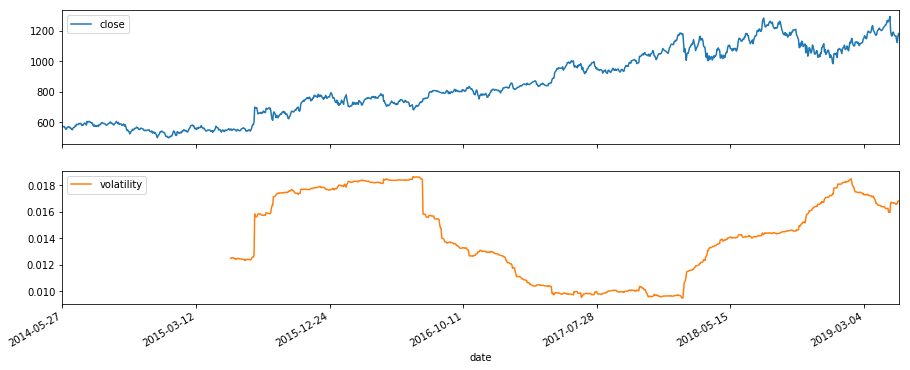

In [48]:
df_goog[['close', 'volatility']].plot(subplots=True, figsize=(15, 6))

## Summary

Let's summarize some of the things we have done including some more pandas I/O techniques

### Set-up
Panda's has a very versatile and excellent support for various data file import. We will also use exoplantes data set of catalog of exoplanets -- planets outside our solar system -- compiled by exoplanets.org



In [74]:
# Necessary imports
import pandas as pd
import numpy as np
%matplotlib inline

# Some Jupyter notebook options for better readability
pd.options.display.max_rows = 6
pd.options.display.max_columns = 8

# Let us check the above settings
pd.__version__

'0.24.2'

In [77]:
import os
if not os.path.exists('tmp'):
    os.mkdir('tmp')

#Define a convenience function to help us clean up
def clean_tmp(file_name="tmp/exoplanet.csv"):
    if os.path.isfile(file_name):
        os.remove(file_name)

### Read and Inspect
Below is a simple demonstration of reading and inspecting data.

In [78]:
filename = "data/exoplanets.csv"
data = pd.read_csv(filename)
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [79]:
data.iloc[0:2]

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205


In [80]:
data.index

RangeIndex(start=0, stop=1642, step=1)

#### Date as an index

In [82]:
data = pd.read_csv(filename, parse_dates=True, index_col='DATE')
data.head(10)

,NAME,FIRSTREF,FIRSTURL,NUM_OBS,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
DATE,,,,,,,,,
1988-01-01,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,131.0,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1989-01-01,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,74.0,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
1992-01-01,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,NaN,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1996-01-01,47 UMa b,Butler 1996,http://adsabs.harvard.edu/abs/1996ApJ...464L.153B,NaN,...,+10:59:28.22,+40:25:48.44,1.063000,1.118690
1996-01-01,70 Vir b,Marcy 1996,http://adsabs.harvard.edu/abs/1996ApJ...464L.147M,74.0,...,+13:28:25.95,+13:46:48.68,1.101000,1.597750
1997-01-01,16 Cyg B b,Cochran 1997,http://adsabs.harvard.edu/abs/1997ApJ...483..457C,95.0,...,+19:41:52.10,+50:31:04.51,0.956000,1.117600


In [83]:
#changed index
data.index

DatetimeIndex(['1988-01-01', '1989-01-01', '1992-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1996-01-01', '1997-01-01',
               ...
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01'],
              dtype='datetime64[ns]', name='DATE', length=1642, freq=None)

#### Sort using index
We can sort using index `set_index` option

In [84]:
data = data.set_index(data.index.sort_values(ascending = False))
data.iloc[0:3]

,NAME,FIRSTREF,FIRSTURL,NUM_OBS,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
DATE,,,,,,,,,
2015-01-01,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,131.0,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
2015-01-01,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,74.0,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2015-01-01,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,NaN,...,13:00:03.577,+12:40:56.4,NaN,NaN


### Some basic data cleaning
We will see more in detail in another notebook 

#### Listing columns

In [86]:
data.columns

Index(['NAME', 'FIRSTREF', 'FIRSTURL', 'NUM_OBS', 'MASS(mjupiter)',
       'RADIUS(rjupiter)', 'PERIOD(day)', 'ECCENTRICITY',
       'SEMI_MAJOR_AXIS(AU)', 'SEPARATION(AU)', 'STAR_NAME', 'DIST(PARSEC)',
       'RA_STRING(h:m:s)', 'DEC_STRING(d:m:s)', 'STAR_MASS(msun)',
       'STAR_RADIUS(rsun)'],
      dtype='object')

Extracting just a column as series or DataFrame

In [88]:
data_series = data['RADIUS(rjupiter)']
print(type(data_series))
data_series

<class 'pandas.core.series.Series'>


DATE
2015-01-01   NaN
2015-01-01   NaN
2015-01-01   NaN
              ..
1992-01-01   NaN
1989-01-01   NaN
1988-01-01   NaN
Name: RADIUS(rjupiter), Length: 1642, dtype: float64

In [90]:
data_df = data[['RADIUS(rjupiter)']]
print(type(data_df))
data_df

<class 'pandas.core.frame.DataFrame'>


,RADIUS(rjupiter)
DATE,
2015-01-01,NaN
2015-01-01,NaN
2015-01-01,NaN
...,...
1992-01-01,NaN
1989-01-01,NaN
1988-01-01,NaN
